In [1]:
import numpy as np

from scipy.stats import beta, binom
from scipy.special import logit, expit

import matplotlib.pyplot as plt
import seaborn as sns

### Disease example

There is a laboratory test that detects a disease A. Denote by $T=1$ the event of a positive test and $T=0$ the event of a negative test, and by $E=1$ that the pacient has the diseas meanwhile $E=0$ denotes that the pacient does not have the disease.

The test has the following characteristics:

$$\mathbb{P}(T=1|E=1)=0.92,\quad \mathbb{P}(T=0|E=0)=0.99.$$

Te prevalence of the disease is 0.12, that is $$\mathbb{P}(E=1)=0.12.$$

If I got a positive test, what is the probability that I have the disease?

In [2]:
PT1GivenE1, PT0GivenE0 = 0.92, 0.99
PT1GivenE0 = 1 - PT0GivenE0

PE1 = 0.12
PE0 = 1 - PE1

PE1GivenT1 = PT1GivenE1 * PE1 / (PT1GivenE1 * PE1 + PT1GivenE0 * PE0)

print(round(PE1GivenT1,4))

0.9262


---

### Female proportion of birth

Laplace estimated the proportion of girl births. A total of 241,945 girls and 251,527 boys were born in Paris from 1745 to 1770. In analyzing the binomial model, Laplace used the uniform prior distribution. Let be $\theta$ the **probability of a female birth** and $y|\theta$ the observed female births. The model is then $$\theta\sim \textsf{Uniform}(0,1)$$ and $$y|\theta\sim\textsf{Binomial}(n,\theta),$$ where $n$ is the total number of births. Thus $$\theta|y\sim\textsf{Beta}(y+1, n-y+1)$$

In [3]:
fem_births = 241945
mal_births = 251527

In [4]:
beta.sf(0.5, fem_births+1, mal_births+1)

1.1460584901556499e-42

---

### Probability of a girl birth given placenta previa

Placenta previa is an unusual condition of pregnancy in which the placenta is implanted low in the uterus. An early study concerning the sex of placenta previa births in Germany found of a total of 980 births, 437 were female.

In [5]:
births = 987
fem_births = 437

Posterior mean

In [6]:
beta.mean(fem_births+1, births-fem_births+1).round(3)

0.443

Posterior interval

In [7]:
LowInterval = beta.mean(fem_births+1, births-fem_births+1) - 2 * beta.std(fem_births+1, births-fem_births+1)
UppInterval = beta.mean(fem_births+1, births-fem_births+1) + 2 * beta.std(fem_births+1, births-fem_births+1)

round(LowInterval,3), round(UppInterval,3)

(0.411, 0.474)

We can also simulate a sample from the posterior to make inferences

In [8]:
PosteriorSample = beta.rvs(size=1000, a=fem_births+1, b=births-fem_births+1)

<AxesSubplot:ylabel='Density'>

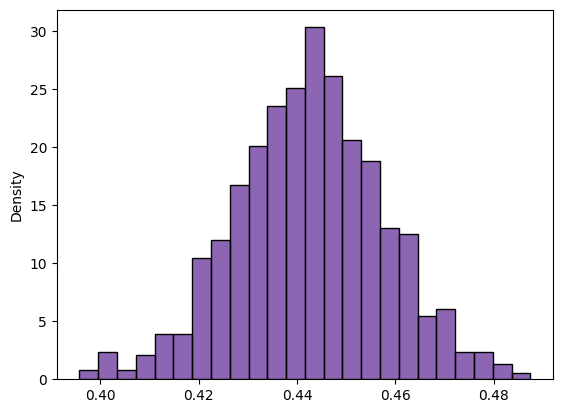

In [9]:
sns.histplot(PosteriorSample, color='rebeccapurple', stat='density')

In [10]:
np.quantile(PosteriorSample, [0.025, 0.975]).round(3)

array([0.412, 0.472])

The normal approximation is generally improved by applying it the logit transform, $\log (\frac{\theta}{1-\theta})$, which transforms the parameter space from the unit interval to the real line.

In [11]:
LogitPosteriorSample = logit(PosteriorSample)

<AxesSubplot:ylabel='Density'>

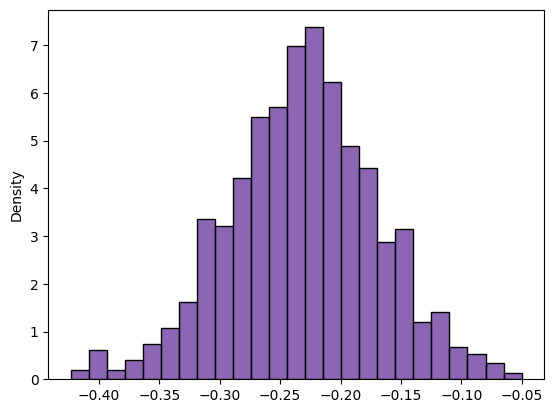

In [12]:
sns.histplot(LogitPosteriorSample, color='rebeccapurple', stat='density')

In [18]:
LowLogitInterval = LogitPosteriorSample.mean() - 2 * LogitPosteriorSample.std()
UppLogitInterval = LogitPosteriorSample.mean() + 2 * LogitPosteriorSample.std()

expit(LowLogitInterval).round(3), expit(UppLogitInterval).round(3)

(0.412, 0.473)

---

A particular population of cells might be in one of the nest three states of production of a protein. The states are A, B, and C, of low, medium and high production, respectively. We take a random sample of 20 cells, and we verify if each one of the cells is in production of the protein (the result of the test is yes or no (1 or 0) for each analyzed cell). From this test we detect that 12 cells are in production (1) and the rest are not (0).On the other hand, if the propulation is in state A, we expect that 20% of the cells produces the protein, 50% for the state B, and 70% for the state C.

What is the probability that the population is in each one of these states?

In [14]:
theta_A = 0.2
theta_B = 0.5
theta_C = 0.7

In [15]:
print(theta_A**12 * (1-theta_A)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8))
print(theta_B**12 * (1-theta_B)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8))
print(theta_C**12 * (1-theta_C)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8))

0.0003689659385173454
0.5120431003054828
0.4875879337559998


In [16]:
p_A = binom.pmf(12, 20, theta_A)
p_B = binom.pmf(12, 20, theta_B)
p_C = binom.pmf(12, 20, theta_C)

In [17]:
print(p_A/(p_A+p_B+p_C))
print(p_B/(p_A+p_B+p_C))
print(p_C/(p_A+p_B+p_C))

0.00036896593851734545
0.5120431003054832
0.4875879337559995
